NOTEBOOK 01: DATA PREPROCESSING
Mục tiêu: Đọc, làm sạch và chuẩn hóa dữ liệu IBM HR Analytics# CELL 1: Import Libraries


1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.0.3
NumPy version: 1.24.3


2. Load Data

In [2]:
data_path = '../data/raw/IBM_HR_Analytics.csv'

try:
    df = pd.read_csv(data_path)
    print("✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please ensure the dataset is in '../data/raw/' folder")
    print("Download from: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset")
    # Create sample data for demonstration
    df = None

# Display basic information
if df is not None:
    print(f"\n{'='*70}")
    print("DATASET OVERVIEW")
    print('='*70)
    print(f"Number of samples: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✓ Dataset loaded successfully!

DATASET OVERVIEW
Number of samples: 1470
Number of features: 35
Memory usage: 1.12 MB


3. Data Structure Analysis

In [3]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Display column names and types
print("\n" + "="*70)
print("COLUMN INFORMATION")
print("="*70)
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Dtype': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Sample Value': [df[col].iloc[0] for col in df.columns]
})
print(df_info.to_string(index=False))

# Data types summary
print("\n" + "="*70)
print("DATA TYPES SUMMARY")
print("="*70)
print(f"Numeric columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"Categorical columns: {df.select_dtypes(include=['object']).shape[1]}")

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)


First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvem

4. Missing Values Analysis

In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(
    'Missing Count', ascending=False
)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing Percentage'])
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('../results/figures/eda/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

✓ No missing values found in the dataset!


5. Duplicate Detection

In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Percentage of duplicates: {100 * duplicates / len(df):.2f}%")
    print("\nRemoving duplicates...")
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("✓ No duplicates found!")

Number of duplicate rows: 0
✓ No duplicates found!


6. Descriptive Statistics - Numeric Features

In [6]:
# Basic statistics
desc_stats = df[numeric_cols].describe()
print("\nBasic Statistics:")
print(desc_stats)

# Additional statistics
print("\n" + "="*70)
print("ADDITIONAL STATISTICS")
print("="*70)

additional_stats = pd.DataFrame({
    'Column': numeric_cols,
    'Skewness': [df[col].skew() for col in numeric_cols],
    'Kurtosis': [df[col].kurtosis() for col in numeric_cols],
    'Range': [df[col].max() - df[col].min() for col in numeric_cols],
    'IQR': [df[col].quantile(0.75) - df[col].quantile(0.25) for col in numeric_cols]
})
print(additional_stats.to_string(index=False))


Basic Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602

7.Descriptive Statistics - Categorical Features

In [7]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        print(f"    {val}: {count} ({100*count/len(df):.1f}%)")


Attrition:
  Unique values: 2
  Value counts:
    No: 1233 (83.9%)
    Yes: 237 (16.1%)

BusinessTravel:
  Unique values: 3
  Value counts:
    Travel_Rarely: 1043 (71.0%)
    Travel_Frequently: 277 (18.8%)
    Non-Travel: 150 (10.2%)

Department:
  Unique values: 3
  Value counts:
    Research & Development: 961 (65.4%)
    Sales: 446 (30.3%)
    Human Resources: 63 (4.3%)

EducationField:
  Unique values: 6
  Value counts:
    Life Sciences: 606 (41.2%)
    Medical: 464 (31.6%)
    Marketing: 159 (10.8%)
    Technical Degree: 132 (9.0%)
    Other: 82 (5.6%)
    Human Resources: 27 (1.8%)

Gender:
  Unique values: 2
  Value counts:
    Male: 882 (60.0%)
    Female: 588 (40.0%)

JobRole:
  Unique values: 9
  Value counts:
    Sales Executive: 326 (22.2%)
    Research Scientist: 292 (19.9%)
    Laboratory Technician: 259 (17.6%)
    Manufacturing Director: 145 (9.9%)
    Healthcare Representative: 131 (8.9%)
    Manager: 102 (6.9%)
    Sales Representative: 83 (5.6%)
    Research Direc

8. Target Variable Analysis


JobSatisfaction Statistics:
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

JobSatisfaction Distribution:
JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64


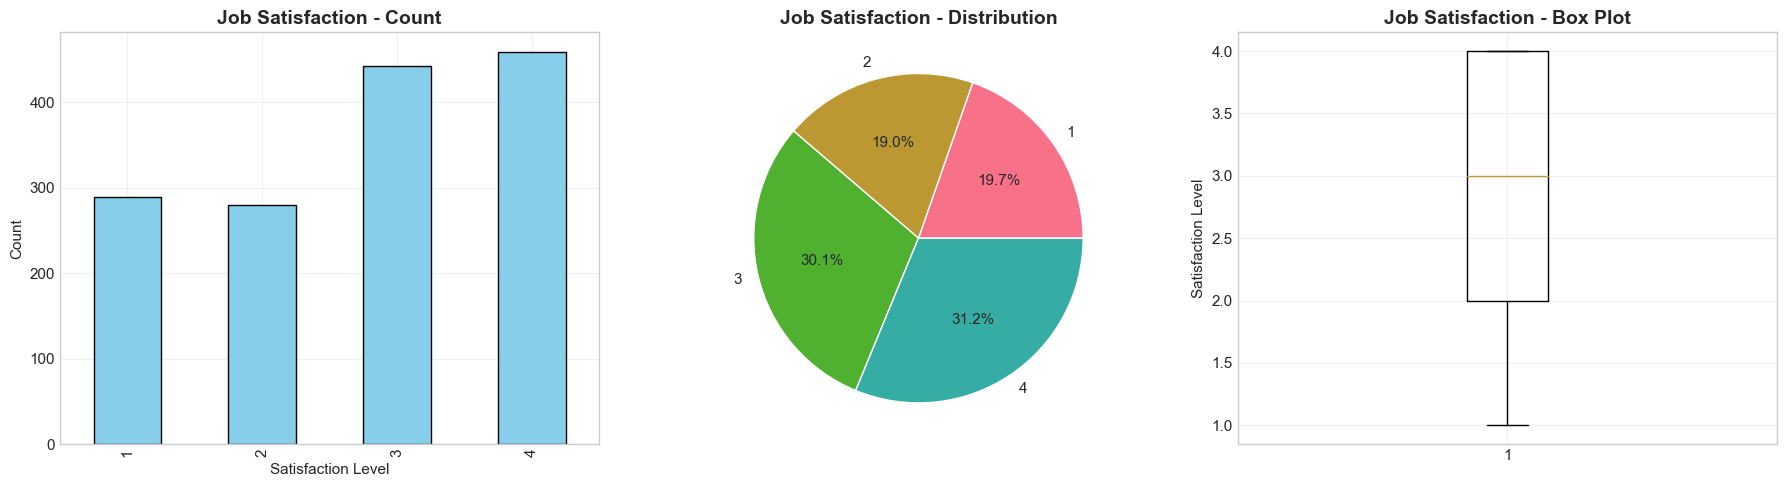


✓ Target variable visualization saved!


In [9]:
target_col = 'JobSatisfaction'

if target_col in df.columns:
    print(f"\nJobSatisfaction Statistics:")
    print(df[target_col].describe())

    print(f"\nJobSatisfaction Distribution:")
    print(df[target_col].value_counts().sort_index())

    # Visualize target distribution
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Bar plot
    df[target_col].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title('Job Satisfaction - Count', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Satisfaction Level')
    axes[0].set_ylabel('Count')
    axes[0].grid(True, alpha=0.3)

    # Pie chart
    df[target_col].value_counts().sort_index().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title('Job Satisfaction - Distribution', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')

    # Box plot
    axes[2].boxplot(df[target_col])
    axes[2].set_title('Job Satisfaction - Box Plot', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Satisfaction Level')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('../results/figures/eda/target_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n✓ Target variable visualization saved!")

9. Outlier Detection


Columns with outliers:
                 Column  Outliers Percentage Lower Bound Upper Bound
  TrainingTimesLastYear       238     16.19%        0.50        4.50
      PerformanceRating       226     15.37%        3.00        3.00
          MonthlyIncome       114      7.76%    -5291.00    16581.00
YearsSinceLastPromotion       107      7.28%       -4.50        7.50
         YearsAtCompany       104      7.07%       -6.00       18.00
       StockOptionLevel        85      5.78%       -1.50        2.50
      TotalWorkingYears        63      4.29%       -7.50       28.50
     NumCompaniesWorked        52      3.54%       -3.50        8.50
     YearsInCurrentRole        21      1.43%       -5.50       14.50
   YearsWithCurrManager        14      0.95%       -5.50       14.50


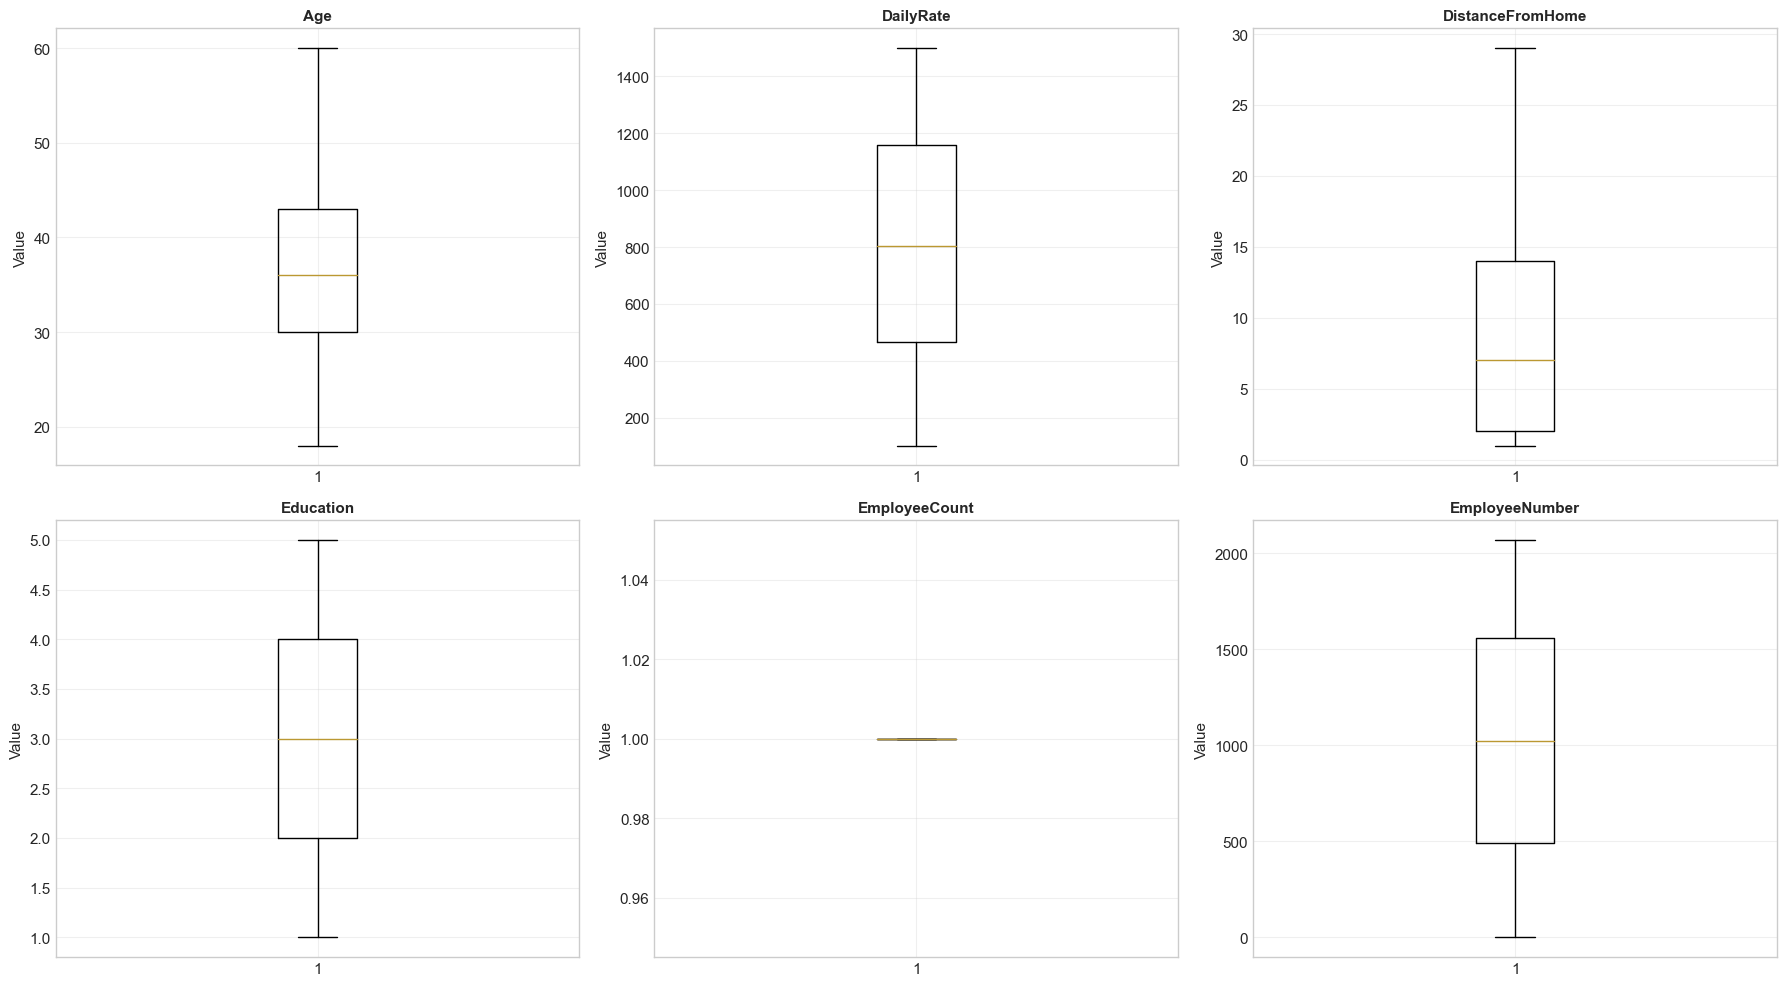


✓ Outlier visualization saved!


In [10]:
def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Outliers': n_outliers,
        'Percentage': f"{100 * n_outliers / len(df):.2f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['Outliers'] > 0].sort_values('Outliers', ascending=False)

if len(outlier_df) > 0:
    print("\nColumns with outliers:")
    print(outlier_df.to_string(index=False))
else:
    print("✓ No significant outliers detected!")

# Visualize outliers for top numeric columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:6]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda/outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Outlier visualization saved!")

10.Handle Missing Values

In [11]:
df_clean = df.copy()

# For numeric columns: fill with median
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"✓ Filled {col} with median: {median_val:.2f}")

# For categorical columns: fill with mode
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"✓ Filled {col} with mode: {mode_val}")

print(f"\n✓ All missing values handled!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")


✓ All missing values handled!
Remaining missing values: 0


11.Encode Categorical Variables

In [12]:
df_encoded = df_clean.copy()

# Option 1: One-Hot Encoding
print("\nUsing One-Hot Encoding...")
print(f"Original shape: {df_encoded.shape}")

# Get categorical columns (excluding target if it's categorical)
cat_cols_to_encode = [col for col in categorical_cols if col != target_col]

# One-hot encode
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols_to_encode, drop_first=True, dtype=int)

print(f"After encoding shape: {df_encoded.shape}")
print(f"New columns added: {df_encoded.shape[1] - df_clean.shape[1]}")

# Display sample of encoded data
print("\nSample of encoded data:")
print(df_encoded.head())

# Save column names for later use
encoded_columns = df_encoded.columns.tolist()
print(f"\n✓ Total columns after encoding: {len(encoded_columns)}")


Using One-Hot Encoding...
Original shape: (1470, 35)
After encoding shape: (1470, 48)
New columns added: 13

Sample of encoded data:
   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40 

12.Feature Scaling/Normalization

Features shape: (1470, 47)
Target shape: (1470,)

✓ Features scaled using StandardScaler (mean=0, std=1)

Scaling verification:
Mean of features: 0.000000
Std of features: 0.957773


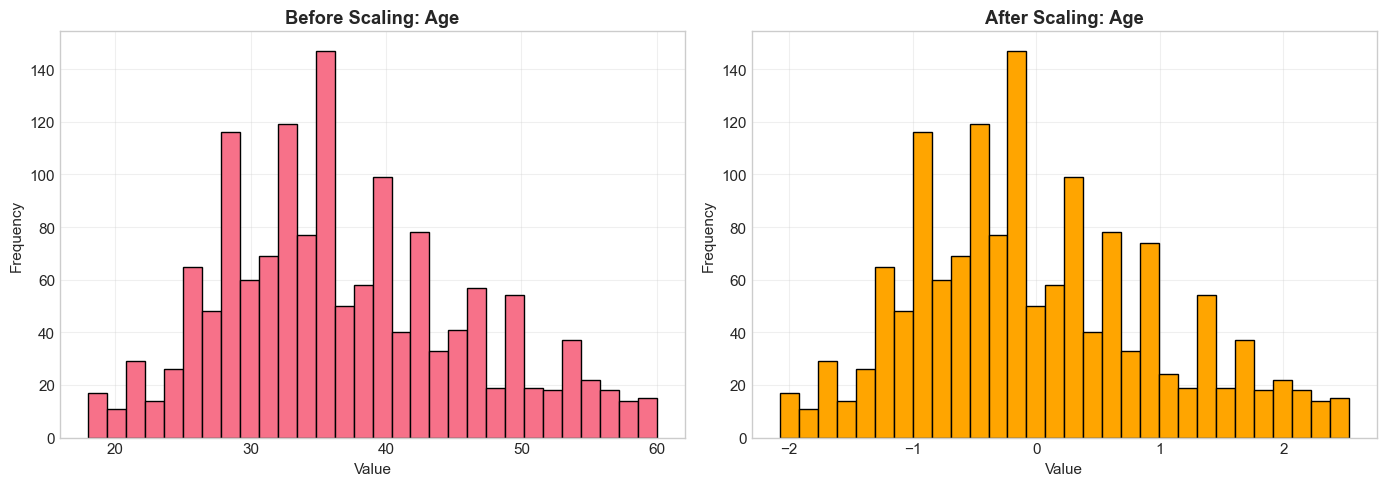


✓ Scaling visualization saved!


In [13]:
df_normalized = df_encoded.copy()

# Separate features and target
if target_col in df_normalized.columns:
    target = df_normalized[target_col]
    features = df_normalized.drop(target_col, axis=1)
else:
    target = None
    features = df_normalized

print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape if target is not None else 'N/A'}")

# StandardScaler: mean=0, std=1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Add target back
if target is not None:
    df_normalized = pd.concat([features_scaled_df, target], axis=1)
else:
    df_normalized = features_scaled_df

print("\n✓ Features scaled using StandardScaler (mean=0, std=1)")

# Verify scaling
print("\nScaling verification:")
print(f"Mean of features: {features_scaled_df.mean().mean():.6f}")
print(f"Std of features: {features_scaled_df.std().mean():.6f}")

# Compare before and after
comparison_col = features.columns[0]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(features[comparison_col], bins=30, edgecolor='black')
axes[0].set_title(f'Before Scaling: {comparison_col}', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(features_scaled_df[comparison_col], bins=30, edgecolor='black', color='orange')
axes[1].set_title(f'After Scaling: {comparison_col}', fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda/scaling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Scaling visualization saved!")

13.Final Data Summary

In [14]:
print(f"\nOriginal data shape: {df.shape}")
print(f"After preprocessing shape: {df_normalized.shape}")
print(f"\nTotal features: {df_normalized.shape[1] - (1 if target_col in df_normalized.columns else 0)}")
if target_col in df_normalized.columns:
    print(f"Target variable: {target_col}")

print("\n" + "="*70)
print("DATA QUALITY CHECKS")
print("="*70)
print(f"✓ Missing values: {df_normalized.isnull().sum().sum()}")
print(f"✓ Duplicate rows: {df_normalized.duplicated().sum()}")
print(f"✓ Data types consistent: {df_normalized.select_dtypes(include=[np.number]).shape[1]} numeric columns")


Original data shape: (1470, 35)
After preprocessing shape: (1470, 48)

Total features: 47
Target variable: JobSatisfaction

DATA QUALITY CHECKS
✓ Missing values: 0
✓ Duplicate rows: 0
✓ Data types consistent: 48 numeric columns


14.Save Preprocessed Data

In [17]:
print("\n" + "="*70)
print("SAVING PREPROCESSED DATA")
print("="*70)

# Save at different stages
# 1. Cleaned data (no missing, no duplicates)
df_clean.to_csv('../data/processed/data_cleaned.csv', index=False)
print("✓ Saved: data_cleaned.csv")

# 2. Encoded data (categorical → numeric)
df_encoded.to_csv('../data/processed/data_encoded.csv', index=False)
print("✓ Saved: data_encoded.csv")

# 3. Normalized data (scaled features)
df_normalized.to_csv('../data/processed/data_normalized.csv', index=False)
print("✓ Saved: data_normalized.csv")

# Save scaler for future use
import joblib
joblib.dump(scaler, '../data/processed/scaler.pkl')
print("✓ Saved: scaler.pkl")

# Save metadata
metadata = {
    'original_shape': df.shape,
    'final_shape': df_normalized.shape,
    'numeric_columns': numeric_cols,
    'categorical_columns': categorical_cols,
    'encoded_columns': encoded_columns,
    'target_column': target_col,
    'preprocessing_steps': [
        '1. Missing value imputation',
        '2. Duplicate removal',
        '3. Categorical encoding (One-Hot)',
        '4. Feature scaling (StandardScaler)'
    ]
}

import json
with open('../data/processed/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4, default=str)
print("✓ Saved: metadata.json")


SAVING PREPROCESSED DATA
✓ Saved: data_cleaned.csv
✓ Saved: data_encoded.csv
✓ Saved: data_normalized.csv
✓ Saved: scaler.pkl
✓ Saved: metadata.json


15.Export Summary Report

In [19]:
summary_report = f"""
{'='*70}
DATA PREPROCESSING SUMMARY REPORT
{'='*70}

1. DATASET INFORMATION
   - Original samples: {df.shape[0]}
   - Original features: {df.shape[1]}
   - Final samples: {df_normalized.shape[0]}
   - Final features: {df_normalized.shape[1]}

2. DATA QUALITY
   - Missing values handled: Yes
   - Duplicates removed: {duplicates}
   - Outliers detected: {len(outlier_df)} columns

3. FEATURE ENGINEERING
   - Numeric features: {len(numeric_cols)}
   - Categorical features: {len(categorical_cols)}
   - Features after encoding: {df_encoded.shape[1]}

4. PREPROCESSING STEPS
   ✓ Missing value imputation (median for numeric, mode for categorical)
   ✓ Duplicate removal
   ✓ One-Hot Encoding for categorical variables
   ✓ StandardScaler normalization (mean=0, std=1)

5. OUTPUT FILES
   ✓ data_cleaned.csv - After basic cleaning
   ✓ data_encoded.csv - After encoding
   ✓ data_normalized.csv - Final preprocessed data
   ✓ scaler.pkl - Fitted scaler object
   ✓ metadata.json - Preprocessing metadata

{'='*70}
Preprocessing completed successfully!
Time: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*70}
"""

print(summary_report)
print("\n" + "="*70)
print("✓ PREPROCESSING COMPLETE!")
print("="*70)
print("\nNext steps:")
print("1. Run 02_EDA_and_Visualization.ipynb for detailed exploratory analysis")
print("2. Run 03_Dimensionality_Reduction.ipynb for PCA and t-SNE")
print("="*70)


DATA PREPROCESSING SUMMARY REPORT

1. DATASET INFORMATION
   - Original samples: 1470
   - Original features: 35
   - Final samples: 1470
   - Final features: 48

2. DATA QUALITY
   - Missing values handled: Yes
   - Duplicates removed: 0
   - Outliers detected: 10 columns

3. FEATURE ENGINEERING
   - Numeric features: 26
   - Categorical features: 9
   - Features after encoding: 48

4. PREPROCESSING STEPS
   ✓ Missing value imputation (median for numeric, mode for categorical)
   ✓ Duplicate removal
   ✓ One-Hot Encoding for categorical variables
   ✓ StandardScaler normalization (mean=0, std=1)

5. OUTPUT FILES
   ✓ data_cleaned.csv - After basic cleaning
   ✓ data_encoded.csv - After encoding
   ✓ data_normalized.csv - Final preprocessed data
   ✓ scaler.pkl - Fitted scaler object
   ✓ metadata.json - Preprocessing metadata

Preprocessing completed successfully!
Time: 2025-11-03 13:48:57


✓ PREPROCESSING COMPLETE!

Next steps:
1. Run 02_EDA_and_Visualization.ipynb for detailed exp